## Приоритезация гипотез и анализ результатов А/В теста

В данной работе мы будем заниматься исследованием списка гипотез, предоставленных нам отделом маркетинга, и выбором наиболее перспективной для последующего увеличения выручки нашего интернет-магазина.<br> Для ответа на вопрос "какая гипотеза лучше?" необходимо будет провести процесс приоретизации гипотез, запустить A/B-тест и проанализировать его результаты

## Оглавление 

### [Изучение общей информации](#step1)
#### [Таблица hypothesis](#step2)
#### [Таблица orders](#step3)
#### [Таблица visitors](#step4)
## [Приоритизация гипотез](#step5)
#### [Фреймворк ICE для приоритизации гипотез ](#step6)
#### [Фреймворк RICE для приоритизации гипотез](#step7)
## [Анализ A/B-теста](#step8)
#### [График кумулятивной выручки по группам](#step9)
#### [График кумулятивного среднего чека по группам](#step10)
#### [ График относительного изменения кумулятивного среднего чека группы B к группе A](#step11)
#### [График кумулятивной конверсии по группам](#step12)
#### [График относительного изменения кумулятивной конверсии группы B к группе A](#step13)
#### [Точечный график количества заказов по пользователям](#step14)
#### [Расчет 95-й и 99-й перцентилей количества заказов на пользователя](#step15)
#### [Точечный график стоимостей заказов](#step16)
#### [Расчет 95-й и 99-й перцентилей стоимости заказов](#step17)
#### [Статистическая значимость различий в конверсии между группами по «сырым» данным](#step18)
#### [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#step19)
#### [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#step20)
#### [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#step21)
##  [Вывод](#step22)

## Изучение общей информации <a name="step1"></a>

### Данные для первой части
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>

### Данные для второй части
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st
import scipy.stats as stats

In [2]:
#Загрузим датасеты
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Рассмотрим подробнее каждую из талиц и приведем данные к необходимым форматам, регистрам, проверим таблицы на наличие дубликатов и пустот

* Таблица hypothesis<a name="step2"></a>

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Приведем название столбцов к нижнему регистру

In [4]:
hypothesis = hypothesis.rename(columns={'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact':'impact','Confidence':'confidence','Efforts':'efforts'})

In [5]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


* Таблица orders <a name="step3"></a>

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Приведем название столбцов к нижнему регистру

In [8]:
orders.columns = ['transaction_id','visitor_id','date','revenue','group']

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null int64
group             1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Даты не в том формате, в котором нужно, меняем

In [10]:
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


* Таблица visitors <a name="step4"></a>

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


С датами тоже самое, что и в предыдущей таблице. Меняем

In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Посмотрим, что там с дубликатами и с пустотами

In [16]:
hypothesis.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
visitors.duplicated().sum()

0

Дубликатов нет

In [19]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [20]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [21]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пустот тоже нет

Данные "чистые" и приведены к нужному формату и регистру

Проверим, не имеются ли у нас пользователи, попавшие в обе группы

In [22]:
orders.groupby('visitor_id')['group'].unique()

visitor_id
5114589          [B]
6958315          [B]
8300375       [B, A]
11685486         [A]
39475350         [B]
               ...  
4266935830    [A, B]
4278982564       [A]
4279090005       [B]
4281247801       [B]
4283872382       [B]
Name: group, Length: 1031, dtype: object

Такие действительно есть. Получим их полный список

In [23]:
np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Удаляем, опираясь на слова старшего преподавателя кагорты:<br> "С точки зрения чистоты эксперимента я всегда за то, что надо пользователей из обеих групп удалять, это ошибка — мы не сможем достоверно сказать, что именно повлияло на поведение людей, их стандартный паттерн поведения на сайте или измененный нами в ходе эксперимента. Всего пользователей 1031, в обе группы попали 58 — это немного, их можно легко удалить. А если бы таких было большинство, то навряд ли можно было бы сделать хорошие выводы из этих данных." (с)

In [24]:
list1= [   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830]


In [25]:
orders = orders.loc[~orders['visitor_id'].isin(list1)]
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [26]:
np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

array([], dtype=int64)

### Приоритизация гипотез <a name="step5"></a>

#### Примените фреймворк ICE для приоритизации гипотез <a name="step6"></a>

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [27]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [28]:
hypothesis.sort_values(by = 'ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Text(0.5, 1.0, 'Priority of hypothesis')

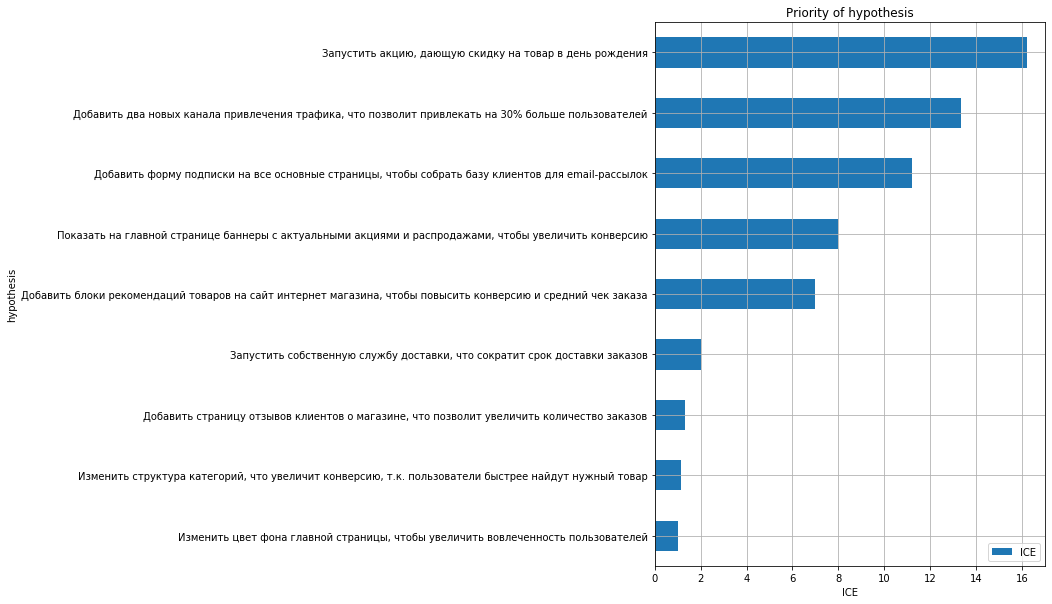

In [29]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values(by = 'ICE', ascending=True).plot(kind='barh' , grid = True, figsize = (7,10))
ax.set_xlabel('ICE')
ax.set_title('Priority of hypothesis')

Самой востребованной кажется гипотеза об акции в день рождения

#### Примените фреймворк RICE для приоритизации гипотез <a name="step7"></a>

RICE (R от англ. reach, «охват»)

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [30]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [31]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Text(0.5, 1.0, 'Reach of hypothesis')

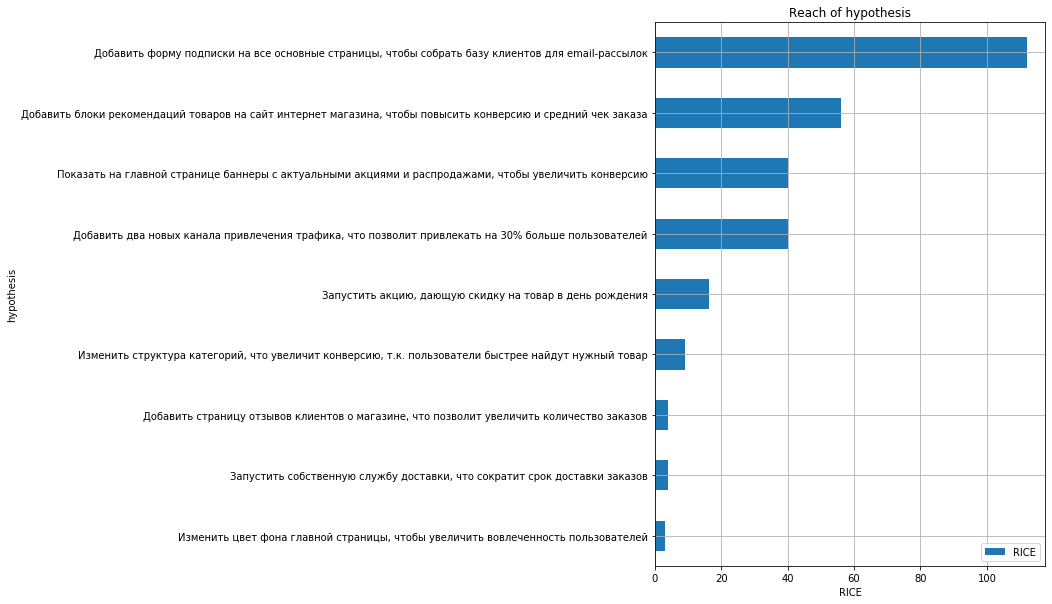

In [32]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values(by = 'RICE', ascending=True).plot(kind='barh' , grid = True, figsize = (7,10))
ax.set_xlabel('RICE')
ax.set_title('Reach of hypothesis')

Здесь все несколько иначе, и гипотеза об акции на день рождения отошла аж на 5е место. Больше всего пользователей затрагивает гипотеза о доп вожможностях подписки

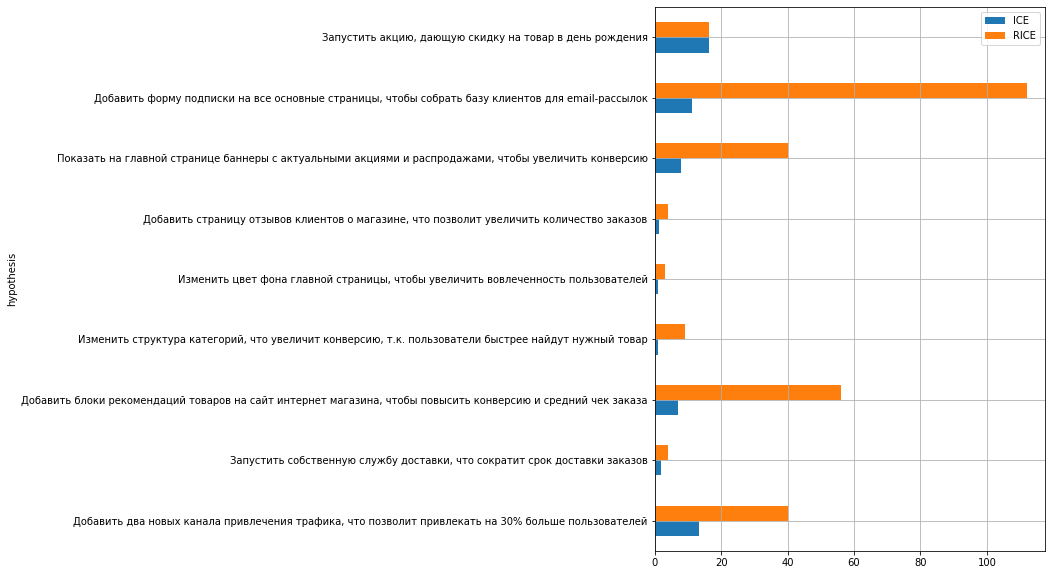

In [33]:
hypothesis[['hypothesis', 'ICE', 'RICE']].set_index('hypothesis').plot(kind='barh' , grid = True, figsize = (7,10))

Показатели разные потому что при приоритезации гипотез не достаточно опираться только на силу гипотез, необходимо учитывать, как много пользователей она затронет

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

### Анализ A/B-теста <a name="step8"></a>

#### Постройте график кумулятивной выручки по группам <a name="step9"></a>

In [34]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [35]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [36]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [37]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [38]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [39]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [40]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


In [41]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


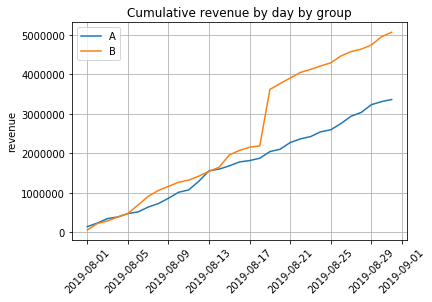

In [42]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue by day by group')
plt.ylabel('revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

В группе А выручка растет более линейно, в группе В есть что то похожее на выброс

#### Постройте график кумулятивного среднего чека по группам <a name="step10"></a>

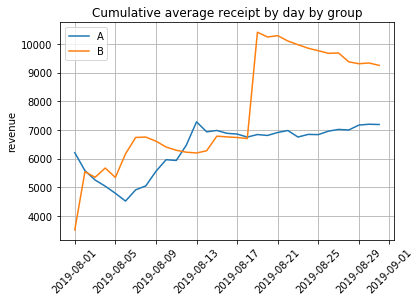

In [43]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average receipt by day by group')
plt.ylabel('revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

По чекам тоже самое, сильный всплеск в группе В

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A <a name="step11"></a>

In [44]:
#Объединяем таблицы
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


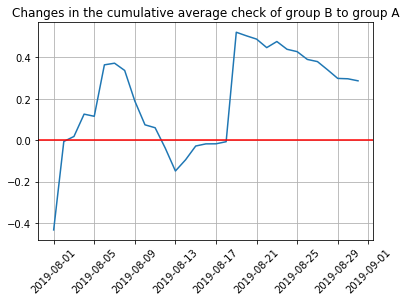

In [45]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid(True)
plt.xticks(rotation=45)
plt.title('Changes in the cumulative average check of group B to group A')
# добавляем ось X для наглядности
plt.axhline(y=0, color='red') 
plt.show()

#### Постройте график кумулятивной конверсии по группам <a name="step12"></a>

In [46]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


In [47]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0, 0.5, 'conversion')

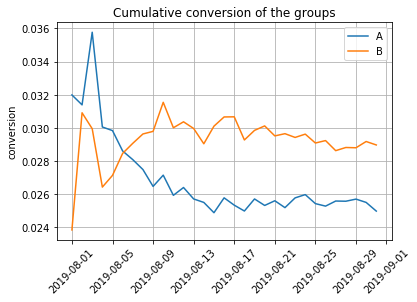

In [48]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.title('Cumulative conversion of the groups')
plt.ylabel('conversion')

На данном графике конверсия выглядит очень нестабильно. Добавим масштаб для наглядности

['2019-08-01', '2019-09-01', 0, 0.05]

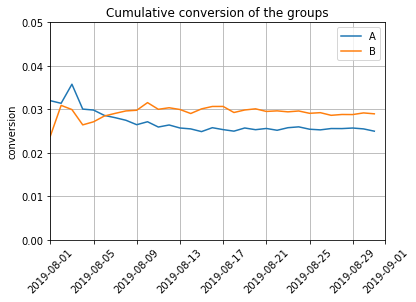

In [49]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.title('Cumulative conversion of the groups')
plt.ylabel('conversion')
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])

При добавлении мастшатабирования видно, что конверсия, на самом деле, практически установилась около своего среднего значения. В начале графика есть скачки, но потом она выравнивается. У группы А конверсия в районе 0.03, у группы B 0.034

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> После удаления тех, кто попал в обе группы, конверсия А стала равна 0.25 и она упала относительно начальных показателей. Конверсия В стала равна 0.03</div>

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A <a name="step13"></a>

In [50]:
#Объединяем таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


['2019-08-01', '2019-09-01', -0.5, 0.5]

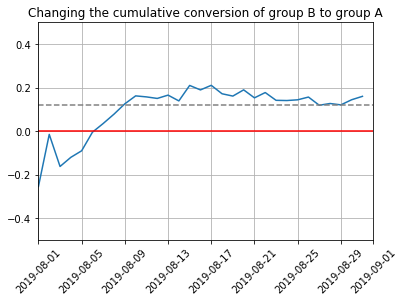

In [51]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Changing the cumulative conversion of group B to group A')
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(y=0, color='red')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

В группе В показатели конверсии лучше. Разница между группами выравнивается приблизительно на 12%

#### Постройте точечный график количества заказов по пользователям <a name="step14"></a>

In [52]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.head()

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [53]:
ordersByUsers.columns = ['user_id','orders']

In [54]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [55]:
ordersByUsers['orders'].median()

1.0

In [56]:
x_values = pd.Series(range(0,len(ordersByUsers)))

Text(0, 0.5, 'orders')

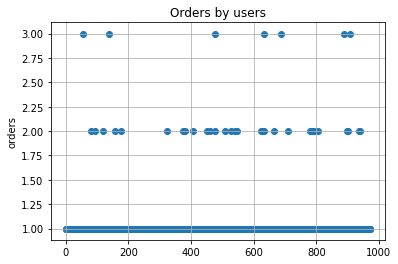

In [57]:
plt.scatter(x_values,ordersByUsers['orders'])
plt.grid(True)
plt.title('Orders by users')
plt.ylabel('orders')

В среднем, пользователи заказывают один раз. На графике видны пользователи, которые делали заказ гораздо больше одного раза,даже больше 10ти это могут быть выбросы, ведь таких пользователей очень немного

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> И тут все поменялось. Максимальное кол-во заказов теперь 3</div>

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей <a name="step15"></a>

In [58]:
 np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

In [59]:
print('95 перцентиль количества заказов на пользователя: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль количества заказов на пользователя: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

95 перцентиль количества заказов на пользователя: 1.00
99 перцентиль количества заказов на пользователя: 2.00


Не более 1% пользователей совершали больше 4х заказов. Следовательно, все, что выше этих показателей-выбросы

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Не более 1% пользователей совершали больше 2х заказов. Следовательно, все, что выше этих показателей-выбросы </div>

#### Постройте точечный график стоимостей заказов <a name="step16"></a>

In [60]:
orders['revenue'].median()

2955.0

In [61]:
x_values = pd.Series(range(0,len(orders['revenue'])))

Text(0, 0.5, 'revenue')

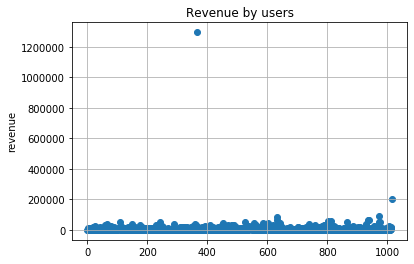

In [62]:
plt.scatter(x_values,orders['revenue'])
plt.grid(True)
plt.title('Revenue by users')
plt.ylabel('revenue')

Здесь невооруженным глазом видны выбросы

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  <a name="step17"></a>

In [63]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

In [64]:
print('95 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль стоимости заказов: 26785.00
99 перцентиль стоимости заказов: 53904.00


Не более чем у 5% заказов чек больше 28000, и не более чем у 1% дороже 58233. Может все, кто выше- Биллы Гейтсы или просто транжиры, но я сколоняюсь к тому, что все же все показатели, что выше-выбросы

<div style="border:solid green 2px; padding: 20px">
<img src=http://storage.yandexcloud.net/public-bucket-6/outliers_1.png></div> <br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> В случае с выручкой все "уехало" не так сильно, но все же. Теперь не более чем у 5% заказов чек больше 26785, и не более чем у 1% дороже 53904. </div>

#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. <a name="step18"></a>

Количество визитов по дате

Для группы А

In [65]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [66]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Для группы В

In [67]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [68]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Количество заказов в день для группы А

In [69]:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [70]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Для группы В

In [71]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [72]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [73]:
#Объединяем все таблицы
table = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [74]:
table.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Число заказов для пользователей, совершивших хотя бы 1 заказ

Для группы А

In [75]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

Для группы В

In [76]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули

In [77]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(table['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [78]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(table['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Статистическая значимость различия конверсии по результатам двух недель теста. Тест Манна-Уитни

Нулевая гипотеза: Конверсия в группе A равна конверсии в группе B <br>
Альтернативная гипотеза: Конверсия в группе A НЕ равна конверсии в группе B

In [79]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1].round(3)
print('p-value: {}'.format(results))
if results < alpha:
    print('Отвергаем нулевую гипотезу. По «сырым» данным присутствуют статистически значимые различия в конверсии между группами A и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу. По «сырым» данным статистически значимых различий в конверсии между группами A и B нет')

p-value: 0.011
Отвергаем нулевую гипотезу. По «сырым» данным присутствуют статистически значимые различия в конверсии между группами A и B


In [80]:
print("Относительное различие в конверсии между группами: {0:.3f}".format((table['ordersPerDateB'].sum()/table['visitorsPerDateB'].sum())/(table['ordersPerDateA'].sum()/table['visitorsPerDateA'].sum())-1)) 

Относительное различие в конверсии между группами: 0.160


Различие между группами есть. Конверсия в группе B превышает конверсию в группе А со статистической значимостью.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным <a name="step19"></a>

Нулевая гипотеза: Средний чек в группе A равен среднему чеку в группе B <br>
Альтернативная гипотеза: Средний чек в группе A НЕ равен среднему чеку в группе B

In [81]:
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1].round(3)
print('p-value: {}'.format(results))
if results < alpha:
    print('Отвергаем нулевую гипотезу. По «сырым» данным присутствуют статистически значимые различия в среднем чеке заказа между группами A и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу. По «сырым» данным статистически значимых различий в среднем чеке заказа между группами A и B нет')

p-value: 0.829
Не получилось отвергнуть нулевую гипотезу. По «сырым» данным статистически значимых различий в среднем чеке заказа между группами A и B нет


In [82]:
orders[orders['group']=='A']['revenue'].mean()

7189.4358974358975

In [83]:
orders[orders['group']=='B']['revenue'].mean()

9249.94890510949

In [84]:
print("Относительный прирост среднего чека группы B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительный прирост среднего чека группы B: 0.287


Наблюдается относительный прирост среднего чека в группе В, но это по "сырым" данным, посмотрим, как обстоит вопрос с "очищенными"

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным <a name="step20"></a>

99й перцентиль стоимости заказов: 58233.20.<br>
99й перцентиль количества заказов на пользователя: 4.00

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Сейчас немного по другому.<br> 99й перцентиль стоимости заказов: 53904 <br> 99й перцентиль количества заказов на пользователя: 2.00 </div>

Посмотрим на пользователей с аномальными данными

In [85]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)

In [86]:
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']

In [87]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers

1099     148427295
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
dtype: int64

А вот и наши аномальные ребята, их не так много. Отфильтруем их, что бы не портили тест

In [88]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(table['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [89]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(table['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Проводим тест Манна-Уитни еще раз, только по отфильтрованным данным

Нулевая гипотеза: Конверсия в группе A равна конверсии в группе B <br>
Альтернативная гипотеза: Конверсия в группе A НЕ равна конверсии в группе B

In [90]:
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1].round(3)
print('p-value: {}'.format(results))
if results < alpha:
    print('Отвергаем нулевую гипотезу. По «очищенным» данным присутствуют статистически значимые различия в конверсии между группами A и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу. По «очищенным» данным статистически значимых различий в конверсии между группами A и B нет')

p-value: 0.006
Отвергаем нулевую гипотезу. По «очищенным» данным присутствуют статистически значимые различия в конверсии между группами A и B


In [91]:
print("Относительный прирост конверсии очищенной группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительный прирост конверсии очищенной группы B: 0.202


Прирост конверсии группы В наблюдается даже после очистки

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным<a name="step21"></a>

Статистическая значимость различия средних чеков после удаления аномальных пользователей

In [92]:
clear_orders = orders.query('revenue <= 53904')

Нулевая гипотеза: Средний чек в группе A равен среднему чеку в группе B <br>
Альтернативная гипотеза: Средний чек в группе A НЕ равен среднему чеку в группе B

In [93]:
alpha = 0.05
results = stats.mannwhitneyu(clear_orders[clear_orders['group']=='A']['revenue'], clear_orders[clear_orders['group']=='B']['revenue'], alternative='two-sided')[1].round(3)
print('p-value: {}'.format(results))
if results < alpha:
    print('Отвергаем нулевую гипотезу. По «очищенным» данным присутствуют статистически значимые различия в среднем чеке заказа между группами A и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу. По «очищенным» данным статистически значимых различий в среднем чеке заказа между группами A и B нет')

p-value: 0.901
Не получилось отвергнуть нулевую гипотезу. По «очищенным» данным статистически значимых различий в среднем чеке заказа между группами A и B нет


In [94]:
clear_orders[clear_orders['group']=='A']['revenue'].mean()

6504.548596112311

In [95]:
clear_orders[clear_orders['group']=='B']['revenue'].mean()

6298.827205882353

In [96]:
print("Относительный прирост среднего чека группы B: {0:.3f}".format(clear_orders[clear_orders['group']=='B']['revenue'].mean()/clear_orders[clear_orders['group']=='A']['revenue'].mean()-1)) 

Относительный прирост среднего чека группы B: -0.032


После очистки относительный прирост среднего чека очень мал, да и различие статистически не значимо

### Вывод <a name="step22"></a>

1. У нас наблюдается статистически значимое различие по конверсии между группами А и В как по "сырым" данным, так и после фильтрации аномалий.
2. По "сырым" данным нет статистически значимого различия по среднему чеку между группами А и В. Однако, после фильтрации они тоже не наблюдаются.<br>

Вспомним, как связаны метрики выручка, конверсия, средний чек :

Выручка = Покупатели х Средний чек

Покупатели = Конверсия х Посетители

Итого, и средний чек и конверсия напрямую влияют на выручку. Так, что в ходе АВ теста мы значимо увеличили один из паказателей, период проведения теста (месяц) достаточно большой для ожидания (в том смысле, что бизнес ждать бесконечно не может). Так что можно праздновать победу группы В и разрабатывать новый тест для увеличения среднего чекае не наблюдается, а значит, прибыль почти не увеличивается.